# KERAS image augmentation

This notebook shows how keras deals with image augmentation

In [1]:
import os

import matplotlib.pyplot as plt
import custom.tools as ctools

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


### Create the data generator

In [2]:
HEIGHT = 224
WIDTH = 224

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [3]:
WORKING_DIR = os.getcwd()
IMAGE_DIR = os.path.join(WORKING_DIR, 'data', 'cars_dataset', 'augmentation')
SAVE_DIR = os.path.join(WORKING_DIR, 'data', 'notebooks', '4_image_augmentation')

In [4]:
generator =  datagen.flow_from_directory(IMAGE_DIR, 
                                         batch_size=1,
                                         target_size=(HEIGHT, WIDTH))

Found 1 images belonging to 1 classes.


### Plot what the generator does

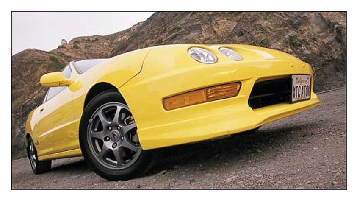

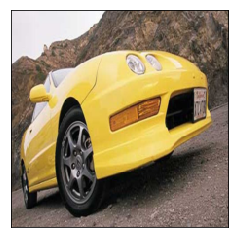

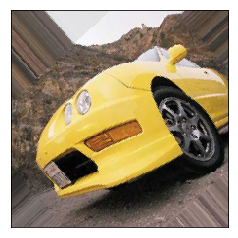

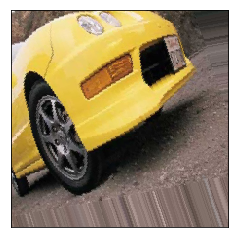

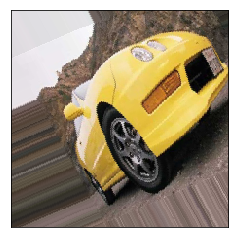

In [8]:
def no_axis_plot(image_array):
    fig, ax = plt.gcf(), plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    imgplot = ax.imshow(image_array)
    return fig

original_img = load_img(os.path.join(IMAGE_DIR, 'original', '000417.jpg'))
i = 0
plt.figure(i)
fig = no_axis_plot(original_img)
ctools.save_matplotlib_fig(fig, 'original.png', SAVE_DIR)

original_resized = load_img(os.path.join(IMAGE_DIR, 'original', '000417.jpg'), target_size=(HEIGHT, WIDTH))
i = 1
plt.figure(i)
fig = no_axis_plot(original_resized)
ctools.save_matplotlib_fig(fig, 'original_resized.png', SAVE_DIR)

for batch in generator:
    i += 1
    plt.figure(i)
    fig = no_axis_plot(array_to_img(batch[0][0]))
    ctools.save_matplotlib_fig(fig, 'augmented'+str(i-1)+'.png', SAVE_DIR)
    if i % 4 == 0:
        break
plt.show()